<a href="https://colab.research.google.com/github/peela85/-mustached-lana/blob/master/MiniHackathon_III_StackOverflow_Classification_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement


The problem as a part of this Mini-hackathon, is for you to be able to classify a given pair of stackoverflow posts, as duplicate, direct-link, indirect-link or unrelated. The features will be the word2vec average representation of the two posts, and the label will 4 possibilities mentioned above.


** You will be graded on the following activities as a part of this larger problem: **

1.   Using pre-trained Word2Vec model, to get a word2vec representation of the 'massaged' stackoverflow data (i.e. no preprocessing would be required)
2.   Building classifiers using SKLearn and reporting accuracies.
3.   We have provided an architecture such that the entire data can be clustered, and classifiers can run on each cluster using multithreading. Your task is to only create a KMeans clustering definition using SKLearn, and plug it at the location asked.

** The objective of this experiment below is to show alternate possibilities of classifications using good representations and using concepts such as multithreading over clusters. You're thus combining, classification, clustering (enabled by multi-threading) ** . Further the foundation code would also give an insight into how to build generic-code so that you can run multiple classifiers and compare the results.



## VERY IMP NOTE: 
1. Do ensure you are using Python 3. 
2. GPU is not needed.
3. There is a lot of code here below, however please narrow down to exactly what is being asked. (that will help you score on the tasks while gradually understanding the pieces of the code.) ** Also it is recommended to read this notebook bottom-up, so that you start from what is asked and then get into details. Also the code is arranged the same way **
4.  Please be clinical in your implementation. Make necessary copies before making edits (as there are several lines of code and might get difficult to track changes). Avoid "Reset all runtimes" (as this will force you download entire word2vec again; "Restart runtime" is better as it doesn't refresh the drive i.e. all the files that you downloaded will still be present, and only the session variables will be refreshed) ; also be very sure about your changes before running the last KMeans section (else you might have to keep waiting for about 10 to 15 mins each time) 
5.  Finally please look for the graded problems in the last cell of this notebook; That will further guide you to relevant sections in the notebook that you need to fill

## Data

<pre>

The original data is stored in ASEDataset folder.

├── ASEDataset
│   ├── _4_SentenceData.txt
│   ├── testPair.txt
│   └── trainingPair.txt


 scores in testPair.txt    ID	    type
 
    1.00              |    1     |  duplicate
    0.8                |    2     |  direct link
 btwn 0 / 0.9         |    3     |  indirect link
    0.00              |    4     |  isolated
The structure of the training/testing data is stored in pandas.dataframe format.

>>> train_pd.head
ID,    'PostId', 'RelatedPostId', 'LinkTypeId', 'PostIdVec', 'RelatedPostIdVec', 'Output'
0       283           297          1              [...]         [...]              [...]
1        56            68          2              [...]         [...]              [...]
2         5            16          3              [...]         [...]              [...] 
3      9083          6841          4              [...]         [...]              [...]   
4      5363          5370          1              [...]         [...]              [...]  
5       928           949          2              [...]         [...]              [...]  
...
'PostIdVec' and 'RelatedPostIdVec' represent the word embeddings of corresponding posts.

The relationship between 'PostId' (or 'Related PostId') and Sentence in '_4_SentenceData.txt' is :

The Nth line of _4_SentenceData.txt is the text of the question whose Id is N+1. For example,

PostId: 283, refers to the 283th line of text in _4_SentenceData.txt 
RelatedPostId: 297, refers to the 296th line of text in _4_SentenceData.txt 
LinkTypeId:1, menas that they're duplicate.

</pre>

## Code walkthrough:

Here is a short code walkthrough, by explanation of all the pieces below (there are code comments within the code as well. Those might not be covered below). 

-   Firstly we download the word2vec embedding an unzip them. For this we have the ** prepare_word2vec() ** method </br>
-   We then call the classifier code (or for the last section clustering code) such as ** run_MLP  or run_KNN_baseline or run_SVM_baseline **
>-  In either of the three above, the logic is the same and is as follows:
>>-  Create a word2vec representation of your data i.e. the textual post related to postId and relatedPostId is taken, and a word to vec represenation is crated out of it. Further, the average of these two representation is your feature vecture; and the fact that they are duplicate, direct-link etc are labels. You have to code this part under **get_document_vec** method. (Look out for "YOUR CODE BELOW" tag)
>>- After the above is done, train-test split is performed and a classifer (using SKlearn) has to be defined. The variable ** clf ** will hold the classifier and that has to be defined by you with the parameters. (Start off with the most basic.)
-   ** run_kmeans_m ** is different from the above in that, after loading the data in a similar fashion, instead of calling a single classifier, the data is first clustered to multiple clusters, and for each cluster a classifier is called (using Python threading) . Read the code comments on the function.

## Setup Steps

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902225" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "9059040698" #@param {type:"string"}


In [58]:
#@title Run this cell to complete the setup for this Notebook

from IPython import get_ipython
ipython = get_ipython()
  
notebook="M1_Mini_Hackathon_AuthorIdentification" #name of the notebook
Answer = "This notebook is not graded"
def setup():
#  ipython.magic("sx pip3 install wget")
   ipython.magic("sx wget https://www.dropbox.com/s/9d7r7m3q85met13/Mini_hackathon_III.zip?dl=1")
   ipython.magic("sx unzip Mini_hackathon_III.zip?dl=1")
   print ("Setup completed successfully")
   return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### NOTE: Please feel free to use ML libraries such as Sklearn  etc whereever applicable

#### Ensure you change to the directory below

In [59]:
%cd Mini_hackathon_III/

/content/Mini_hackathon_III/Mini_hackathon_III/Mini_hackathon_III


In [60]:
ls

ASEDataset/  helpers.py  learners.py  newabcd.py  tuner.py  utility.py


In [61]:
%cd Mini_hackathon_III/

[Errno 2] No such file or directory: 'Mini_hackathon_III/'
/content/Mini_hackathon_III/Mini_hackathon_III/Mini_hackathon_III


In [62]:
!pip install wget

In [0]:
import warnings
import os
import wget
import zipfile
import random
import numpy as np
import gensim
import pandas as pd
import threading
from sklearn import metrics
import matplotlib.pyplot as plt


#used by k-means
from multiprocessing import Queue
from sklearn.cluster import KMeans

#importing models
from sklearn import svm

#related to training algorithm
from learners import SK_SVM,SK_KNN,SK_MLP
from helpers import tune_learner#this takes care of importing tune_learner method
#from tuner import DE_Tune_ML
from sklearn.model_selection import StratifiedKFold

#Generic
import timeit
from utility import study

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

NOTE: 
In the cell above the imports for 'learners', 'helpers' etc pertain to local modules. Here are some FAQs:</br>
-   If you run the command "%ls " you will see a few .py files. These are the local modules. 
-   If you intend to read them, you can either download and open in your editer. Or use "%cat fileName.py"
-   You can further edit it (by using a local editor after downloading file) and upload it back. However ensure you do run the command "%run fileName.py" for your session to reload the file into the colab runtime (editing file on disk is not the same as having the file loaded on runtime)

### ALERT: Your code change expected in the cell below (look for the tag: " YOUR CODE HERE ")

In [0]:
from __future__ import division
import pdb
import os
import numpy as np
import pandas as pd
import pickle


class PaperData(object):
  def __init__(self, word2vec, dir="ASEDataset" + os.path.sep):
    self.word2vec = word2vec
    self.sentences = self.load_sentences(dir + "_4_SentenceData.txt")
    self.train_src = dir + "trainingPair.txt"
    self.test_src = dir + "testPair.txt"
    self.train_data = self.load_data(self.train_src)
    self.test_data = self.load_data(self.test_src)

  def load_data(self, dir):
    result = pd.DataFrame()
    data = pd.read_table(dir)
    i = 0
    while i < len(data):
      result = self.save(result, pd.DataFrame(
        [[data.iloc[i, 0], data.iloc[i + 1, 0], data.iloc[i + 3, 0]]],
        columns=["PostId", "RelatedPostId", "LinkTypeId"]))
      i += 5
    return result

  def load_sentences(self, dir):
    result = pd.read_table(dir, sep="\n", header=None)
    return result

  def get_document_vec(self, data, file_name=""):
    """
    this will get the word vector representations for original posts and realted
    posts, and store the results back to data, which is in pandas dataframe.

    For example, the results will have the following columns.

    "PostId","RelatedPostId","LinkType","PostIdVec","RelatedPostIdVec","Output"

    Output will be the mean of corresponding "PostIdVec" and
    "RelatedPostIdVec""

    mappings between labels and id's

    1.00              |    1     |  duplicate
    0.8               |    2     |  direct link
    0<x<0.8           |    3     |  indirect link
    0.00              |    4     |  isolated


    :param data: pandas.DataFrame of train or test data
    :return: None
    """
    if len(data) <= 0 or not isinstance(data, pd.DataFrame):
      raise ValueError(
        "Please generate {0} in pandas.dataframe first!".format(
          str(data)))
    if not self.word2vec:
      raise ValueError("Please load pre-trained word2vec mode first!")
    data["PostIdVec"] = ""
    data["RelatedPostIdVec"] = ""
    for column in ["RelatedPostId", "PostId"]: 
      rows = list(map(int, data[column].tolist())) #Changed to a list
      pd_posts = self.sentences.iloc[rows, 0]
      for index, post_sentences in enumerate(pd_posts.tolist()):  
        key_list = post_sentences.split(" ")
        
        #YOUR CODE HERE .START (NOTE: key_list above contains the sentences. x below is word to vec representation of ...
        #...each word of the sentence) And self.word2vec is the word2vec model which you can use to get your representations
        x = np.array([self.word2vec[i] for i in key_list if i in self.word2vec])
        # YOUR CODE HERE END
        word_count = len(x)
        word_vecs = np.sum(x, axis=0)
        data.set_value(index, column + "Vec", word_vecs / word_count)
    data["Output"] = (data["PostIdVec"] + data["RelatedPostIdVec"]) / 2
    if file_name:
      with open(file_name, "wb") as mypickle:
        pickle.dump(data, mypickle)
    return data

  def save(self, out, result):
    if out.empty:
      out = result
    else:
      out = out.append(result, ignore_index=True)
    return out


In [0]:
def results_SVM_C(predicted, test_Y):  
  # labels: ["Duplicates", "DirectLink","IndirectLink", "Isolated"]
  report_gen = metrics.classification_report(
      test_Y, predicted, labels=["1", "2", "3", "4"], digits=3)
  print(report_gen)
  return 

In [0]:
#@study is a Python decorator used internally. It is not relevant to your task, and hence you can skip understanding it.
@study
def run_tuning_SVM_C(word2vec_src,train_pd_c,queue,l,test_pd_c,repeats=1,
                   fold=2,
                   tuning=True):
  """
  :param word2vec_src:str, path of word2vec model
  :param repeats:int, number of repeats
  :param fold: int,number of folds
  :param tuning: boolean, tuning or not.
  :return: None
  """
  #print("# word2vec:", word2vec_src)
  #word2vec_model = gensim.models.Word2Vec.load(word2vec_src)
  #data = PaperData(word2vec=word2vec_model)
  train_pd_c = train_pd_c.reset_index()
  train_pd = train_pd_c
  test_pd = test_pd_c
  # NOTE: The line below merely tries to 'substitue' the string 'learner' with the string 'SK_SVM'. SK_SVM is the wrapper around ..
  # ...the SVM classifier. This wrapper is needed because in addition to fitting classifier it also defines methods to report scores
  # ..and accuracies.
  learner = [SK_SVM][0] 
  goal = {0: "PD", 1: "PF", 2: "PREC", 3: "ACC", 4: "F", 5: "G", 6: "Macro_F",
          7: "Micro_F"}[6]
  F = {}
  clfs = []
  for i in range(repeats):  # repeat n times here
#    kf = StratifiedKFold(train_pd.loc[:, "LinkTypeId"].values, fold,
 #                        shuffle=True)
  #  for train_index, tune_index in kf:
    kf = StratifiedKFold(n_splits=fold, random_state=None, shuffle=True)
    for train_index, tune_index in kf.split(train_pd.loc[:, "Output"].values,train_pd.loc[:, "LinkTypeId"].values):

      train_data = train_pd.ix[train_index]
      tune_data = train_pd.ix[tune_index]
      train_X = train_data.loc[:, "Output"].values
      train_Y = train_data.loc[:, "LinkTypeId"].values
      tune_X = tune_data.loc[:, "Output"].values
      tune_Y = tune_data.loc[:, "LinkTypeId"].values
      test_X = test_pd.loc[:, "Output"].values
      test_Y = test_pd.loc[:, "LinkTypeId"].values
      #tuner_learner below internally also tries for find the best paramters of running SVM  
      #using DE classes (#You will find the details of DE classes of this in learners.py. DE standads for 'Differential Evolution'; it is a 
      # mechanism used to find the best parameters to run the classifier with. You may ignore the details of this during the hackathon).
      #..Once it is found it is passes as a parameter to your classifer 'learner' ('learner' is explained early in this cell)
      
      params, evaluation = tune_learner(learner, train_X, train_Y, tune_X,
                                        tune_Y, goal) if tuning else ({}, 0)
      clf = learner(train_X, train_Y, test_X, test_Y, goal)
      F = clf.learn(F, **params)
      clfs.append(clf)
  clfs.append(l)    
  queue.put(clfs)
  return clfs


### ALERT: Your code change expected in the cell below (look for the tag: " YOUR CODE HERE ")

In [0]:
def run_kmeans_m(word2vec_src):

  print("# word2vec:", word2vec_src)
  word2vec_model = gensim.models.Word2Vec.load(word2vec_src)
  data = PaperData(word2vec=word2vec_model)
  train_pd = load_vec(data, data.train_data, use_pkl=False)
  test_pd = load_vec(data, data.test_data, use_pkl=False)
  train_X = train_pd.loc[:, "Output"].tolist()
  train_Y = train_pd.loc[:, "LinkTypeId"].values
  # Each cluster and the classifier which is being trained on it pushed to the 'queue' created below
  queue = Queue()

  #<YOUR CODE HERE --START>
  #numClusters = ?#Experiment with different clusters.
  #clf = Define a Sklearn kmeans cluster with the parameters above
  
  
  #X = model[model.wv.vocab]
  #numClusters = 3
  #clf = KMeansClusterer(numClusters,  distance=nltk.cluster.util.cosine_distance, repeats=25)
  numClusters= 5
  clf = KMeans(numClusters)

  #<YOU CODE END>
  start0 = timeit.default_timer()
  #YOUR CODE HERE: Fit the K-means clustering defined above.
  clf.fit(train_X,train_Y)
  

  labels = clf.labels_
  #centroids = kmeans.cluster_centers_
  
  stop0 = timeit.default_timer()

  svm_models = []  # maintain a list of svms
  s1 = timeit.default_timer()
  data.train_data['clabel'] = clf.labels_
  s2 = timeit.default_timer()
  print("Inter - ", (s2-s1))
  start1 = timeit.default_timer()
  # the run_tuning_SVM_C function below takes care of training the SVM classifier for the passed dataset using KFold.
  target_model = run_tuning_SVM_C
  #For each of the clusters created above, we create a classifier (here it is an SVM inside run_tuning_SVM_C) and pass the..
  #..cluster data as input paramter
  for l in range(numClusters):
    cluster = data.train_data.loc[data.train_data['clabel'] == l] 
    print("Thread No", l)
    #result.append(pool.apply_async(run_KNN_C, args = (word2vec_src,cluster,queue,)))
    t = threading.Thread(target = run_tuning_SVM_C, args = [word2vec_src,cluster,queue,l,test_pd])
    threads.append(t)
    #we now start the threads (until this point though the threads are setup above the process doens't start)
  for th in threads:
      th.start()
    # now we hear back from each of the thread and ensure it completes; i.e. we ensure that the classifier has finished running...
    #.. on the particular cluster
  for th in threads:
      response = queue.get()
      svm_models.append(response)   
  #in the rest of the code below, we take each of the returned classifier and run it on test-data (spefic to each cluster)...
  #.. to determine the accuracies
  svm_models = sorted(svm_models, key = lambda th: th[-1] )    
  stop1 = timeit.default_timer()  
  svm_results = [] # maintain a list of svm results
  test_X = test_pd.loc[:, "Output"].tolist()
  predicted = clf.predict(test_X)
  data.test_data['clabel'] = predicted
  total_predicted = []
  total_cluster_Y = []
  avg_predicted = []
  avg_cluster_Y = []
  print(len(svm_models[l])-1)
  for i in range(len(svm_models[l])-1):
    total_predicted = []
    total_cluster_Y = []
    for l in range(numClusters):
      cluster = data.test_data.loc[data.test_data['clabel'] == l]
      svm_model = svm_models[l][i]
      cluster_X = cluster.loc[:, "Output"].tolist()
      cluster_Y = cluster.loc[:, "LinkTypeId"].tolist()
      total_cluster_Y = np.append(total_cluster_Y,cluster_Y)
      avg_cluster_Y = np.append(avg_cluster_Y,cluster_Y)
      if target_model == run_tuning_SVM_C or target_model == run_tuning_KNN_C:
          predicted_C = svm_model.learner.predict(cluster_X)
      else:
          predicted_C = svm_model.predict(cluster_X)
      total_predicted = np.append(total_predicted,predicted_C)
      avg_predicted = np.append(avg_predicted,predicted_C)
    svm_results.append(results_SVM_C(total_predicted, total_cluster_Y))# store all the SVM result report in a dictionary
  svm_results.append(results_SVM_C(avg_predicted, avg_cluster_Y))
    
    # call the helper method to summarize the svm results
  #total_summary(svm_results, test_pd.shape[0],start0,start1,stop0,stop1,start,stop)      


In [0]:

import matplotlib.pyplot as plt
def run_kmeans_m_get_k(word2vec_src):
  print("# word2vec:", word2vec_src)
  word2vec_model = gensim.models.Word2Vec.load(word2vec_src)
  data = PaperData(word2vec=word2vec_model)
  train_pd = load_vec(data, data.train_data, use_pkl=False)
  test_pd = load_vec(data, data.test_data, use_pkl=False)
  train_X = train_pd.loc[:, "Output"].tolist()
  # Each cluster and the classifier which is being trained on it pushed to the 'queue' created below
  queue = Queue()
  #<YOUR CODE HERE --START>
  #numClusters = ?#Experiment with different clusters.
  #clf = Define a Sklearn kmeans cluster with the parameters above
  #numClusters = 10
  #clf = KMeans(n_clusters=numClusters)
  #<YOU CODE END>
  
  Sum_of_squared_distances = []
  K = range(1,50)
  for k in K:
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    
    kmeans_model.fit(train_X)
 # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
  
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print("k:",k, " cost:", interia)
    Sum_of_squared_distances.append(kmeans_model.inertia_)
    
  plt.plot(K, Sum_of_squared_distances, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Sum_of_squared_distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

### ALERT: Your code change expected in the cell below (look for the tag: " YOUR CODE HERE ")

In [0]:

def get_acc(cm):
  out = []
  for i in range(4):
    out.append(cm[i][i] / 400)
  return out

@study
def run_MLP(word2vec_src): 
  """
  Run SVM+word embedding experiment !
  This is the baseline method.
  :return:None
  """
  # Create a subplot with 1 row and 2 columns
  print("# word2vec:", word2vec_src)
  
  #<YOUR CODE HERE START...DEFINE AN MLP CLASSIFIER.
  
  
  clf = MLPClassifier(alpha = 0.7, max_iter=400) 
  
  
  # YOUR CODE END
  word2vec_model = gensim.models.Word2Vec.load(word2vec_src)
  data = PaperData(word2vec=word2vec_model)
  train_pd = load_vec(data, data.train_data, use_pkl=False)
  test_pd = load_vec(data, data.test_data, use_pkl=False)
  train_X = train_pd.loc[:, "Output"].tolist()
  train_Y = train_pd.loc[:, "LinkTypeId"].tolist()
  test_X = test_pd.loc[:, "Output"].tolist()
  test_Y = test_pd.loc[:, "LinkTypeId"].tolist()
  start = timeit.default_timer()
  #YOUR CODE HERE: START
  # Fit the classifier
  clf.fit(train_X, train_Y)
  
  #YOUR CODE END.
  stop = timeit.default_timer()
  #YOUR CODE HERE: Get the predictions.
  predicted = clf.predict(test_X)
  
  print(metrics.classification_report(test_Y, predicted,
                                      labels=["1", "2", "3", "4"],
                                      digits=3))
  cm=metrics.confusion_matrix(test_Y, predicted, labels=["1", "2", "3", "4"])
  print("accuracy  ", get_acc(cm))
  print("Model training time: ", stop - start)
  #loss_values = clf.estimator.loss_curve_
  #print("Loss Value:", loss_values)
  #plt.plot(loss_values)
  #plt.show()


  

### ALERT: Your code change expected in the cell below (look for the tag: " YOUR CODE HERE ")

In [0]:
@study
def run_SVM_baseline(word2vec_src): 
  """
  Run SVM+word embedding experiment !
  This is the baseline method.
  :return:None
  """
  # Create a subplot with 1 row and 2 columns
  print("# word2vec:", word2vec_src)
  clf = svm.SVC(kernel="rbf", gamma=0.005)
  
  word2vec_model = gensim.models.Word2Vec.load(word2vec_src)
  data = PaperData(word2vec=word2vec_model)
  train_pd = load_vec(data, data.train_data, use_pkl=False)
  test_pd = load_vec(data, data.test_data, use_pkl=False)
  train_X = train_pd.loc[:, "Output"].tolist()
  train_Y = train_pd.loc[:, "LinkTypeId"].tolist()
  test_X = test_pd.loc[:, "Output"].tolist()
  test_Y = test_pd.loc[:, "LinkTypeId"].tolist()
  start = timeit.default_timer()
 #YOUR CODE HERE: START
  # Fit the classifier
  #YOUR CODE END.
  stop = timeit.default_timer()
  predicted = clf.predict(test_X) #YOUR CODE HERE: Get the predictions.  stop = timeit.default_timer()
  print(metrics.classification_report(test_Y, predicted,
                                      labels=["1", "2", "3", "4"],
                                      digits=3))
  cm=metrics.confusion_matrix(test_Y, predicted, labels=["1", "2", "3", "4"])
  print("accuracy  ", get_acc(cm))
  print("Model training time: ", stop - start)

In [0]:

def load_vec(d, data, use_pkl=False, file_name=None):
  if use_pkl:
    if os.path.isfile(file_name):
      with open(file_name, "rb") as my_pickle:
        return pickle.load(my_pickle)
  else:
    # print("call get_document_vec")
    return d.get_document_vec(data, file_name)



### ALERT: Your code change expected in the cell below (look for the tag: " YOUR CODE HERE ")

In [0]:
@study
def run_KNN_baseline(word2vec_src):
  """
  Run KNN+word embedding experiment !
  This is the baseline method.
  :return:None
  """
  # Create a subplot with 1 row and 2 columns
  print("# word2vec:", word2vec_src)
  # YOUR CODE HERE START..
  
  
  clf = KNeighborsClassifier(n_neighbors=5)

  
  
  # YOUR CODE HERE END
  word2vec_model = gensim.models.Word2Vec.load(word2vec_src)
  data = PaperData(word2vec=word2vec_model)
  train_pd = load_vec(data, data.train_data, use_pkl=False)
  test_pd = load_vec(data, data.test_data, use_pkl=False)
  train_X = train_pd.loc[:, "Output"].tolist()
  train_Y = train_pd.loc[:, "LinkTypeId"].tolist()
  test_X = test_pd.loc[:, "Output"].tolist()
  test_Y = test_pd.loc[:, "LinkTypeId"].tolist()
  start = timeit.default_timer()
 #YOUR CODE HERE: START
  # Fit the classifier
  clf.fit(train_X, train_Y)
  
  #YOUR CODE END.
  stop = timeit.default_timer()
  #YOUR CODE HERE: Get the predictions.  stop = timeit.default_timer()
  predicted = clf.predict(test_X)
  print(metrics.classification_report(test_Y, predicted,
                                      labels=["1", "2", "3", "4"],
                                      digits=3))
  cm=metrics.confusion_matrix(test_Y, predicted, labels=["1", "2", "3", "4"])
  print("accuracy  ", get_acc(cm))
  print("Model training time: ", stop - start)


In [0]:
def prepare_word2vec():
  print("Downloading pretrained word2vec models")
  url = "https://zenodo.org/record/807727/files/word2vecs_models.zip"
  file_name = wget.download(url)
  with zipfile.ZipFile(file_name, "r") as zip_ref:
    zip_ref.extractall()

In [73]:
myword2vecs

['word2vecs_models/myword2vec323',
 'word2vecs_models/myword2vec134',
 'word2vecs_models/myword2vec237',
 'word2vecs_models/myword2vec956',
 'word2vecs_models/myword2vec226',
 'word2vecs_models/myword2vec236',
 'word2vecs_models/myword2vec622',
 'word2vecs_models/myword2vec793',
 'word2vecs_models/myword2vec844',
 'word2vecs_models/myword2vec463']

### The code during the first run downloads the word2vec file and hence would wait for about 10 minutes. Subsequent runs would be quicker

In [0]:
word_src = "word2vecs_models"
threads = []
warnings.filterwarnings("ignore")
if not os.path.exists(word_src):
  prepare_word2vec()
elif len(os.listdir(word_src)) == 0:
  os.rmdir(word_src)
  prepare_word2vec()
for x in range(1):
  random.seed(x)
  np.random.seed(x)#Seeding will help in ensuring that the same order of word2vec files are retrieved below.
  #Further multiple models below is used for experimental purposes, but in the case of your hacakthon as you see below, you..
  #..are using only the first model. After completion of the mini-hacakthon, you are free to explore with other..
  #..word2vec models and discuss with your mentors.
  myword2vecs = [os.path.join(word_src, i) for i in os.listdir(word_src)
                 if "syn" not in i]





## Graded problems:

**Note:The primary focus on all the mini-hackathon is not only get through the tasks, but to experiment with various parameters and present the results to the mentor; and you'll be evalutated accordingly. Also, the last one hour of the mini-hackthon will consist of you presenting/discussing your results with the fellow participants. You'll not be graded on that presentation**

### Graded 1: Fill the section "YOUR CODE BELOW" section within the "get_document_vec" function in the beginning of this notebook - 6 Marks
The above is necessary in order to proceed with the rest of the sections below. You are basically, loading the word-to-vec representation for your stackoverflow sentences. The feature vector is the average of the two posts in question. 

### Graded 2: Define appropriate classifiers below (KNN and MLP) using SKLearn, run the cell below. Observe the outputs. Try various parameters and discuss your analysis with the mentors. The weightage here is on the ability to experiment with various parameters and deterimine your observations/conclusion (and not just on classifier definition/call ) = 6* 2 = 12 Marks

In [102]:
# Go to the function definition above and make the necessary changes and then come back to run this.
run_MLP(myword2vecs[x])



### run_MLP ##################################################
# 2019-06-08 10:14:56
# 
# Run SVM+word embedding experiment !
# This is the baseline method.
# :return:None
# 
# word2vec: word2vecs_models/myword2vec323
              precision    recall  f1-score   support

           1      0.831     0.735     0.780       400
           2      0.755     0.700     0.726       400
           3      0.922     0.978     0.949       400
           4      0.789     0.890     0.837       400

    accuracy                          0.826      1600
   macro avg      0.824     0.826     0.823      1600
weighted avg      0.824     0.826     0.823      1600

accuracy   [0.735, 0.7, 0.9775, 0.89]
Model training time:  8.267429839001124

------------------------------------------------------------------------
# Runtime: 75.605 secs


In [96]:
# Go to the function definition above and make the necessary changes to make this function run and then come back to run this.
run_KNN_baseline(myword2vecs[x])



### run_KNN_baseline ##################################################
# 2019-06-08 09:54:27
# 
# Run KNN+word embedding experiment !
# This is the baseline method.
# :return:None
# 
# word2vec: word2vecs_models/myword2vec323
              precision    recall  f1-score   support

           1      0.826     0.703     0.759       400
           2      0.697     0.863     0.771       400
           3      0.856     0.993     0.919       400
           4      0.854     0.642     0.733       400

    accuracy                          0.800      1600
   macro avg      0.808     0.800     0.796      1600
weighted avg      0.808     0.800     0.796      1600

accuracy   [0.7025, 0.8625, 0.9925, 0.6425]
Model training time:  0.04649131000041962

------------------------------------------------------------------------
# Runtime: 70.801 secs


### Graded 3: Define a Kmeans using Sklearn; The objective of clustering is to enable classifer to act at the cluster level. The expectation here is your ability to appreciate the clustering and experiment with the same -  7 Marks
You just need to define and experiment with SKlearn's Kmeans with various parameters (especially number of clusters which is providing you the right outout) and discuss the output with the mentors.</br>
** NOTE : This clustering takes time unlike the above code. So please be sure of your code before deploying, else, you'll end up spending a lot of time waiting **

In [98]:
 # Go to the function definition above and make the necessary changes to make this function run and then come back to run this.

run_kmeans_m(myword2vecs[x])

# word2vec: word2vecs_models/myword2vec323
Inter -  0.0008367260015802458
Thread No 0
Thread No 1
Thread No 2
Thread No 3
Thread No 4

###
###
###
###    run_tuning_SVM_Crun_tuning_SVM_Crun_tuning_SVM_C   ######################################################################################################################################################

##  2019-06-08 10:02:02

2019-06-08 10:02:02#
##run_tuning_SVM_C ################################################## 
 
# :param word2vec_src:str, path of word2vec model
# :param repeats:int, number of repeats
# :param fold: int,number of folds
# :param tuning: boolean, tuning or not.
# :return: None
# # 2019-06-08 10:02:02
 #
###
# :param word2vec_src:str, path of word2vec model
# :param repeats:int, number of repeats
# :param fold: int,number of folds
# :param tuning: boolean, tuning or not.
# :return: None
# 2019-06-08 10:02:02  

# :param word2vec_src:str, path of word2vec model
# :param repeats:int, number of repeats
# :param fold:

# word2vec: word2vecs_models/myword2vec323
k: 1  cost: 56533.67099110666
k: 2  cost: 48924.66158766223
k: 3  cost: 44926.318815669794
k: 4  cost: 42149.45002261766
k: 5  cost: 40593.44573218466
k: 6  cost: 39194.048884570286
k: 7  cost: 38290.226117239465
k: 8  cost: 37553.54762672913
k: 9  cost: 36943.89783091226
k: 10  cost: 36401.82089855171
k: 11  cost: 35876.90724645769
k: 12  cost: 35405.05248283017
k: 13  cost: 34961.118423034095
k: 14  cost: 34559.84901050725
k: 15  cost: 34281.86645050939
k: 16  cost: 33858.582051018886
k: 17  cost: 33472.95383905635
k: 18  cost: 33097.93396375203
k: 19  cost: 32919.79207574105
k: 20  cost: 32574.69153310538
k: 21  cost: 32272.859022223038
k: 22  cost: 32063.561351864504
k: 23  cost: 31746.250457720602
k: 24  cost: 31558.42053821023
k: 25  cost: 31292.45133658654
k: 26  cost: 31026.55344239951
k: 27  cost: 30867.55636089914
k: 28  cost: 30603.482235389052
k: 29  cost: 30408.782370847995
k: 30  cost: 30189.95604362147
k: 31  cost: 29963.7971624

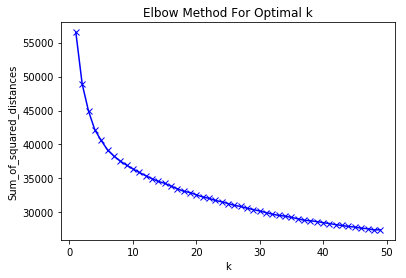

In [104]:
run_kmeans_m_get_k(myword2vecs[x])